# ML for climate and Energy (MEC51057)
# Group project: Weather station

**Mentor**:
- Julio 

**Students**:
- Dimitri Iratchet
- Fabien Lagnieu
- Tristan Waddington

# Draft for Tristan

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import src.utils

from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

reload(src.utils)
from src.utils import load_normalize_data, load_red_data, load_red_norm_data

## 1. Data loading

In [2]:
X_train, X_test, y_train, y_test = load_normalize_data()

In [3]:
# Display shapes of the dataframes
print("Shapes of X_train dataframes:")
for key, value in X_train.items():
    print(f"{key}: {value.shape}")

print("\nShapes of X_test dataframes:")
for key, value in X_test.items():
    print(f"{key}: {value.shape}")

print("\nShapes of y_train dataframes:")
for key, value in y_train.items():
    print(f"{key}: {value.shape}")

print("\nShapes of y_test dataframes:")
for key, value in y_test.items():
    print(f"{key}: {value.shape}")

# Display available names of the dataframes
print("\nAvailable names in X_train:", X_train.keys())
print("Available names in X_test:", X_test.keys())
print("Available names in y_train:", y_train.keys())
print("Available names in y_test:", y_test.keys())

Shapes of X_train dataframes:
blh: (315569, 4)
d2m: (315569, 4)
skt: (315569, 4)
sp: (315569, 4)
ssrd: (315569, 4)
t2m: (315569, 4)
tcc: (315569, 4)
tp: (315569, 4)
u10: (315569, 4)
v10: (315569, 4)

Shapes of X_test dataframes:
blh: (35064, 4)
d2m: (35064, 4)
skt: (35064, 4)
sp: (35064, 4)
ssrd: (35064, 4)
t2m: (35064, 4)
tcc: (35064, 4)
tp: (35064, 4)
u10: (35064, 4)
v10: (35064, 4)

Shapes of y_train dataframes:
blh: (315569, 1)
d2m: (315569, 1)
skt: (315569, 1)
sp: (315569, 1)
ssrd: (315569, 1)
t2m: (315569, 1)
tcc: (315569, 1)
tp: (315569, 1)
u10: (315569, 1)
v10: (315569, 1)

Shapes of y_test dataframes:
blh: (35064, 1)
d2m: (35064, 1)
skt: (35064, 1)
sp: (35064, 1)
ssrd: (35064, 1)
t2m: (35064, 1)
tcc: (35064, 1)
tp: (35064, 1)
u10: (35064, 1)
v10: (35064, 1)

Available names in X_train: dict_keys(['blh', 'd2m', 'skt', 'sp', 'ssrd', 't2m', 'tcc', 'tp', 'u10', 'v10'])
Available names in X_test: dict_keys(['blh', 'd2m', 'skt', 'sp', 'ssrd', 't2m', 'tcc', 'tp', 'u10', 'v10'])
Avail

In [4]:
X_train["blh"]

,marseille,brest,london,berlin
time,,,,
1980-01-01 07:00:00,-0.304960,-1.059357,-1.242151,-0.238806
1980-01-01 08:00:00,-0.316641,-1.101772,-1.220804,-0.269736
1980-01-01 09:00:00,-0.221562,-1.113358,-1.179237,-0.221394
1980-01-01 10:00:00,0.065092,-0.956357,-1.079727,-0.246937
1980-01-01 11:00:00,0.367741,-0.869908,-0.953809,-0.291722
...,...,...,...,...
2015-12-31 19:00:00,-0.944583,-0.068515,0.634647,-1.061930
2015-12-31 20:00:00,-0.969334,-0.770546,0.879556,-1.099512
2015-12-31 21:00:00,-0.994027,-1.045022,0.538919,-1.114498


In [7]:
X_test["ssrd"]

,marseille,brest,london,berlin
time,,,,
2016-01-01 00:00:00,-0.712484,-0.668714,-0.645102,-0.641052
2016-01-01 01:00:00,-0.712484,-0.668714,-0.645102,-0.641052
2016-01-01 02:00:00,-0.712484,-0.668714,-0.645102,-0.641052
2016-01-01 03:00:00,-0.712484,-0.668714,-0.645102,-0.641052
2016-01-01 04:00:00,-0.712484,-0.668714,-0.645102,-0.641052
...,...,...,...,...
2019-12-31 19:00:00,-0.712484,-0.668714,-0.645102,-0.641052
2019-12-31 20:00:00,-0.712484,-0.668714,-0.645102,-0.641052
2019-12-31 21:00:00,-0.712484,-0.668714,-0.645102,-0.641052


## Data reduced to a daily sample

In [4]:
X_train, X_test, X_val, y_train, y_test, y_val = load_red_data()
print(
    f"Shapes: \nX_train: {X_train.shape}, X_test: {X_test.shape}, X_val: {X_val.shape}\n"
    f"y_train: {y_train.shape}, y_test: {y_test.shape}, y_val: {y_val.shape}"
)

Shapes: 
X_train: (3287, 40), X_test: (1096, 40), X_val: (365, 40)
y_train: (3287, 10), y_test: (1096, 10), y_val: (365, 10)


### Data reduceed to a daily sample, **normalized**

In [3]:
X_train_rn, X_test_rn, X_val_rn, y_train_rn, y_test_rn, y_val_rn, scalers = (
    load_red_norm_data()
)
print(
    f"Shapes: \nX_train: {X_train_rn.shape}, X_test_: {X_test_rn.shape}, X_val: {X_val_rn.shape}\n"
    f"y_train: {y_train_rn.shape}, y_test: {y_test_rn.shape}, y_val: {y_val_rn.shape}"
    f" with {len(scalers)} scalers"
)

Shapes: 
X_train: (3287, 40), X_test_: (1096, 40), X_val: (365, 40)
y_train: (3287, 10), y_test: (1096, 10), y_val: (365, 10) with 10 scalers


In [39]:
X_train_rn.describe()

,marseille_blh,marseille_d2m,marseille_skt,marseille_sp,marseille_ssrd,marseille_t2m,marseille_tcc,marseille_tp,marseille_u10,marseille_v10,...,berlin_blh,berlin_d2m,berlin_skt,berlin_sp,berlin_ssrd,berlin_t2m,berlin_tcc,berlin_tp,berlin_u10,berlin_v10
count,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,...,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000
mean,-0.161928,0.086297,0.327177,-0.861811,0.343753,0.323693,-0.508982,0.876370,-0.102568,-0.316843,...,0.103094,-0.315251,-0.231817,0.182726,-0.060248,-0.249342,0.035003,0.868868,-0.073975,0.075336
std,0.654713,0.754248,0.750705,0.379883,0.586158,0.750375,0.672060,2.803296,0.728584,0.687328,...,0.704197,0.803360,0.898946,0.482251,0.538492,0.916286,0.584467,1.878601,0.651331,0.523572
min,-1.298150,-2.641834,-1.273619,-2.615861,-0.789734,-1.646108,-1.438656,-0.071669,-2.941112,-2.674337,...,-1.292492,-3.574062,-3.318279,-2.116716,-0.794529,-3.522042,-1.438656,-0.071669,-1.834522,-1.713200
25%,-0.640821,-0.454383,-0.321082,-1.059391,-0.209394,-0.276259,-1.119359,-0.071669,-0.489824,-0.749278,...,-0.422273,-0.845843,-0.912263,-0.109421,-0.571500,-0.906334,-0.326389,-0.071669,-0.550312,-0.305031
50%,-0.299181,0.137896,0.274643,-0.840105,0.329744,0.316308,-0.586953,-0.071669,-0.098440,-0.196602,...,0.038425,-0.294404,-0.235944,0.194084,-0.143640,-0.235272,0.150335,0.035467,-0.046067,0.092219
75%,0.184880,0.661799,0.985380,-0.639750,0.902060,0.967743,0.055558,0.238244,0.399303,0.170074,...,0.529647,0.303081,0.482726,0.487088,0.384166,0.475218,0.533897,1.038831,0.391405,0.446866
max,2.501329,1.729260,1.831346,0.401678,1.330828,1.874259,0.744106,38.171591,1.685490,1.900887,...,2.973385,1.450550,2.130392,1.839124,1.235074,2.090856,0.744106,23.826088,2.073636,1.803677


## 2. Model instantiation

### 2.1 Baseline model
Predict the values of Paris weather station

In [ ]:
# Baseline model: Linear regression for each variable

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

variables_names = list(X_train.keys())
# Create a linear regression model for each variable
models_per_variable = {}
baseline_mse_per_variable = {}
for variable in variables_names:
    model = LinearRegression()
    model.fit(X_train[variable], y_train[variable])
    models_per_variable[variable] = model
    baseline_mse_per_variable[variable] = []
    # Evaluate per year
    for year in [2016, 2017, 2018, 2019]:
        y_pred = model.predict(
            X_test[variable].iloc[X_test[variable].index.year == year]
        )
        mse = mean_squared_error(
            y_test[variable].iloc[y_test[variable].index.year == year], y_pred
        )
        baseline_mse_per_variable[variable].append(mse)
    # Evaluate for all years
    y_pred = model.predict(X_test[variable])
    mse = mean_squared_error(y_test[variable], y_pred)
    baseline_mse_per_variable[variable].append(mse)

# load into a dataframe
baseline_df = pd.DataFrame(
    baseline_mse_per_variable, index=[2016, 2017, 2018, 2019, "all"]
)
baseline_df.style.background_gradient(cmap="Reds")


,blh,d2m,skt,sp,ssrd,t2m,tcc,tp,u10,v10
2016,0.348459,0.171876,0.100090,0.068001,0.177257,0.103704,0.860530,1.008765,0.250563,0.399177
2017,0.398556,0.163339,0.089868,0.066921,0.153841,0.104578,0.805775,1.158162,0.261364,0.421314
2018,0.374847,0.189975,0.110055,0.062597,0.166506,0.114463,0.889822,1.068445,0.279093,0.440647
2019,0.442302,0.180865,0.096738,0.064776,0.154317,0.098711,0.889952,1.391096,0.282134,0.426654
all,0.391012,0.176511,0.099188,0.065575,0.162990,0.105363,0.861519,1.156516,0.268276,0.421933


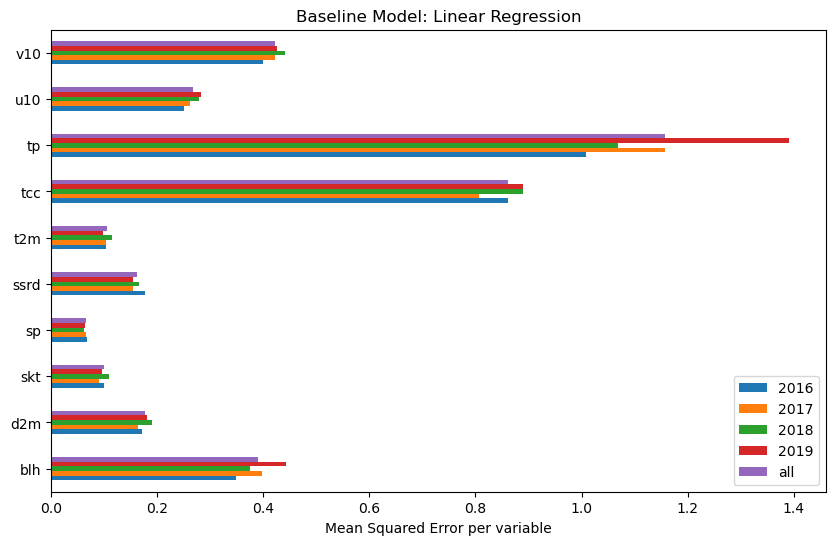

In [ ]:
# Plot the losses per variable
ax = baseline_df.T.plot(kind="barh", figsize=(10, 6))
ax.set_xlabel("Mean Squared Error per variable")
ax.set_title("Baseline Model: Linear Regression")
plt.show()

#### With all variables
Can we get a better prediction of one variables by using all the available features ?
Try a classic regression, then regularize with lasso ro find out the most significative ones.

In [ ]:
# Baseline model: Linear regression for each variable

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

target_variables_names = y_train.columns
# Create a linear regression model for each variable
models_per_variable = {}
baseline_mse_per_variable = {}
for variable in target_variables_names:
    model = LinearRegression()
    # Use the whole dataset for training
    model.fit(X_train, y_train[variable])
    models_per_variable[variable] = model
    baseline_mse_per_variable[variable] = []
    # Evaluate per year
    for year in [2016, 2017, 2018]:
        y_pred = model.predict(X_test.iloc[X_test.index.year == year])
        mse = mean_squared_error(
            y_test[variable].iloc[y_test[variable].index.year == year], y_pred
        )
        baseline_mse_per_variable[variable].append(mse)
    # Evaluate for validation set on 2019
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val[variable], y_pred)
    baseline_mse_per_variable[variable].append(mse)


In [10]:
baseline_mse_per_variable

{'paris_blh': [23096.57412860802,
  23095.02601441404,
  22491.935872783364,
  23340.740630574423],
 'paris_d2m': [2.8523553599310403,
  2.561559223831449,
  3.7205569396951783,
  6.822551473353047],
 'paris_skt': [2.918450384767462,
  1.9892674921493978,
  2.883472789500348,
  3.2202211894713897],
 'paris_sp': [5388.8672429111075,
  6255.823521246284,
  8226.763444992452,
  12110.34159084114],
 'paris_ssrd': [24296546852.443413,
  20524671783.932682,
  21494184079.202797,
  20893721216.21506],
 'paris_t2m': [2.917959182979694,
  2.2030518961130863,
  3.1528809723447995,
  4.0292669923672655],
 'paris_tcc': [0.04343753276112682,
  0.037352399481479635,
  0.042881688940491505,
  0.04158307569234486],
 'paris_tp': [1.6857079280301515e-08,
  1.9573298747971708e-08,
  1.8360430222314076e-08,
  2.0872955645527134e-08],
 'paris_u10': [0.31685126821944304,
  0.323663668944451,
  1.161267590285449,
  2.0302545411239747],
 'paris_v10': [0.5866247823579764,
  0.5937822371439723,
  1.815571994264

In [ ]:
# compute the mean for the whole dataset
for variable, mses in baseline_mse_per_variable.items():
    baseline_mse_per_variable[variable].append(np.mean(mses))


# load into a dataframe
baseline_df = pd.DataFrame(
    baseline_mse_per_variable, index=[2016, 2017, 2018, 2019, "all"]
)
baseline_df.style.background_gradient(cmap="Reds")

,paris_blh,paris_d2m,paris_skt,paris_sp,paris_ssrd,paris_t2m,paris_tcc,paris_tp,paris_u10,paris_v10
2016,23096.574129,2.852355,2.918450,5388.867243,24296546852.443413,2.917959,0.043438,0.000000,0.316851,0.586625
2017,23095.026014,2.561559,1.989267,6255.823521,20524671783.932682,2.203052,0.037352,0.000000,0.323664,0.593782
2018,22491.935873,3.720557,2.883473,8226.763445,21494184079.202797,3.152881,0.042882,0.000000,1.161268,1.815572
2019,23340.740631,6.822551,3.220221,12110.341591,20893721216.215061,4.029267,0.041583,0.000000,2.030255,4.078982
all,23006.069162,3.989256,2.752853,7995.448950,21802280982.948490,3.075790,0.041314,0.000000,0.958009,1.768740


### 2.2 Baseline model with reduced normalize data

#### Predict variable by variable

In [71]:
# Baseline model: Linear regression for each variable
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

target_variables_names = list(y_train_rn.keys())
# Create a linear regression model for each variable
models_per_variable = {}
baseline_mse_per_variable = {}
for variable in target_variables_names:
    variable_name = variable.split("_")[1]
    model = LinearRegression()
    # Select only the corresponding columns
    related_columns = [col for col in X_train_rn.columns if variable_name in col]
    # print(f"Variable: {variable}, related columns: {related_columns}")
    model.fit(X_train_rn[related_columns], y_train_rn[variable])
    # print(f"Model fitted for {variable}:{model.coef_}")
    models_per_variable[variable] = model
    baseline_mse_per_variable[variable] = []
    # Evaluate per test year (set validation appart)
    for year in [2016, 2017, 2018]:
        y_pred = model.predict(
            X_test_rn[related_columns].iloc[
                X_test_rn[related_columns].index.year == year
            ]
        )
        mse = mean_squared_error(
            y_test_rn[variable].iloc[y_test_rn[variable].index.year == year], y_pred
        )
        baseline_mse_per_variable[variable].append(mse)
    # Evaluate for all years
    y_pred = model.predict(X_test_rn[related_columns])
    mse = mean_squared_error(y_test_rn[variable], y_pred)
    baseline_mse_per_variable[variable].append(mse)

# load into a dataframe
baseline_df = pd.DataFrame(baseline_mse_per_variable, index=[2016, 2017, 2018, "all"])
baseline_df.style.background_gradient(cmap="RdYlGn_r")

,paris_blh,paris_d2m,paris_skt,paris_sp,paris_ssrd,paris_t2m,paris_tcc,paris_tp,paris_u10,paris_v10
2016,0.166761,0.062701,0.039654,0.009005,0.085802,0.046109,0.248094,3.223900,0.046913,0.140415
2017,0.193160,0.051314,0.033328,0.009482,0.071674,0.043901,0.210177,3.543318,0.045133,0.129609
2018,0.178478,0.069938,0.044037,0.020020,0.074057,0.048910,0.232721,3.370375,0.054735,0.157305
all,0.179455,0.061319,0.039007,0.012832,0.077186,0.046307,0.230347,3.379056,0.048925,0.142441


#### Predict variable with all available normalized data

In [56]:
# Baseline model: Linear regression for each variable
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

target_variables_names = list(y_train_rn.keys())
# Create a linear regression model for each variable
models_per_variable = {}
baseline_mse_per_variable = {}
for variable in target_variables_names:
    model = LinearRegression()
    model.fit(X_train_rn, y_train_rn[variable])
    # print(f"Model fitted for {variable}:{model.coef_}")
    models_per_variable[variable] = model
    baseline_mse_per_variable[variable] = []
    # Evaluate per test year (set validation appart)
    for year in [2016, 2017, 2018]:
        y_pred = model.predict(X_test_rn.iloc[X_test_rn.index.year == year])
        mse = mean_squared_error(
            y_test_rn[variable].iloc[y_test_rn.index.year == year], y_pred
        )
        baseline_mse_per_variable[variable].append(mse)
    # Evaluate for all years
    y_pred = model.predict(X_test_rn)
    mse = mean_squared_error(y_test_rn[variable], y_pred)
    baseline_mse_per_variable[variable].append(mse)

# load into a dataframe
baseline_df = pd.DataFrame(baseline_mse_per_variable, index=[2016, 2017, 2018, "all"])
baseline_df.style.background_gradient(cmap="RdYlGn_r")

,paris_blh,paris_d2m,paris_skt,paris_sp,paris_ssrd,paris_t2m,paris_tcc,paris_tp,paris_u10,paris_v10
2016,0.142424,0.045776,0.036308,0.001665,0.069907,0.040994,0.206956,2.554993,0.017333,0.042979
2017,0.142414,0.041109,0.024748,0.001933,0.059055,0.030950,0.177964,2.966685,0.017705,0.043503
2018,0.138695,0.059709,0.035873,0.002542,0.061844,0.044294,0.204308,2.782853,0.063525,0.133017
all,0.141179,0.048862,0.032313,0.002046,0.063608,0.038748,0.196419,2.767983,0.032840,0.073139


#### Predict with 1 model on all data

In [62]:
# Baseline model: Linear regression for all variable

model = LinearRegression()
model.fit(X_train_rn, y_train_rn)
y_pred = model.predict(X_test_rn)

# compute the mse by variable and by year
baseline_mse_per_variable = {}
for i_var, variable in enumerate(target_variables_names):
    baseline_mse_per_variable[variable] = []
    for year in [2016, 2017, 2018]:
        mse = mean_squared_error(
            y_test_rn[variable].iloc[y_test_rn.index.year == year],
            y_pred[y_test_rn.index.year == year, i_var],
        )
        baseline_mse_per_variable[variable].append(mse)
    # compute the mean for the whole dataset``
    baseline_mse_per_variable[variable].append(
        np.mean(baseline_mse_per_variable[variable])
    )

# load into a dataframe
print(baseline_mse_per_variable)
baseline_df = pd.DataFrame(baseline_mse_per_variable, index=[2016, 2017, 2018, "all"])
baseline_df.style.background_gradient(cmap="RdYlGn_r")


{'paris_blh': [0.14242355134603316, 0.1424140049990718, 0.13869508810279718, 0.14117754814930072], 'paris_d2m': [0.04577587137289971, 0.04110904524425904, 0.05970915766701097, 0.04886469142805657], 'paris_skt': [0.03630803958663631, 0.024748203097813573, 0.035872888137567525, 0.0323097102740058], 'paris_sp': [0.0016648303329902284, 0.0019326667899816103, 0.002541566661078524, 0.002046354594683454], 'paris_ssrd': [0.0699073577207027, 0.059054711816036755, 0.061844245787721526, 0.06360210510815366], 'paris_t2m': [0.04099398154800314, 0.03095035369404847, 0.044294363387968626, 0.03874623287667341], 'paris_tcc': [0.20695580771545954, 0.17796351480916717, 0.20430751948347964, 0.19640894733603545], 'paris_tp': [2.554993284594634, 2.966685155053806, 2.7828531348850647, 2.768177191511168], 'paris_u10': [0.017332735426827776, 0.017705394624514186, 0.06352489613001086, 0.03285434206045094], 'paris_v10': [0.042978935340868496, 0.043503324687851265, 0.13301748186537704, 0.0731665806313656]}


,paris_blh,paris_d2m,paris_skt,paris_sp,paris_ssrd,paris_t2m,paris_tcc,paris_tp,paris_u10,paris_v10
2016,0.142424,0.045776,0.036308,0.001665,0.069907,0.040994,0.206956,2.554993,0.017333,0.042979
2017,0.142414,0.041109,0.024748,0.001933,0.059055,0.030950,0.177964,2.966685,0.017705,0.043503
2018,0.138695,0.059709,0.035873,0.002542,0.061844,0.044294,0.204308,2.782853,0.063525,0.133017
all,0.141178,0.048865,0.032310,0.002046,0.063602,0.038746,0.196409,2.768177,0.032854,0.073167


In [ ]:
# comparison of parameters
print(f"Single variable parameter: 10x{models_per_variable["paris_blh"].coef_.shape}")
print(f"Whole model parameters: {model.coef_.shape}")


NameError: name 'models_per_variable' is not defined

In [ ]:
# save the mse results
mse_lr_all = [
    0.141178,
    0.048865,
    0.032310,
    0.002046,
    0.063602,
    0.038746,
    0.196409,
    2.768177,
    0.032854,
    0.073167,
]


<div class='alert alert-block alert-warning'>
We get the exact same mse with the same number of paramters if we split the data 
by variable or if we keep the dataset whole.
</div>


### 2.3 Better model SVR
This is a quadratic model that can only predict one variable at a time.

#### Default SVR

In [73]:
# use
from sklearn.svm import SVR

# base line model with default parameters

# Create a linear regression model for each variable
models_per_variable = {}
baseline_mse_per_variable = {}
for variable in target_variables_names:
    variable_name = variable.split("_")[1]
    model = SVR()
    # Select only the corresponding columns
    related_columns = [col for col in X_train_rn.columns if variable_name in col]
    # print(f"Variable: {variable}, related columns: {related_columns}")
    model.fit(X_train_rn[related_columns], y_train_rn[variable].to_numpy())
    # print(f"Model fitted for {variable}:{model.coef_}")
    models_per_variable[variable] = model
    baseline_mse_per_variable[variable] = []
    # Evaluate per test year (set validation appart)
    for year in [2016, 2017, 2018]:
        y_pred = model.predict(
            X_test_rn[related_columns].iloc[
                X_test_rn[related_columns].index.year == year
            ]
        )
        mse = mean_squared_error(
            y_test_rn[variable].iloc[y_test_rn[variable].index.year == year], y_pred
        )
        baseline_mse_per_variable[variable].append(mse)
    # Evaluate for all years
    y_pred = model.predict(X_test_rn[related_columns])
    mse = mean_squared_error(y_test_rn[variable], y_pred)
    baseline_mse_per_variable[variable].append(mse)

# load into a dataframe
baseline_df = pd.DataFrame(baseline_mse_per_variable, index=[2016, 2017, 2018, "all"])
baseline_df.style.background_gradient(cmap="RdYlGn_r")


,paris_blh,paris_d2m,paris_skt,paris_sp,paris_ssrd,paris_t2m,paris_tcc,paris_tp,paris_u10,paris_v10
2016,0.155502,0.060287,0.039347,0.008599,0.081458,0.045046,0.265024,3.483814,0.041329,0.125593
2017,0.182928,0.049533,0.030239,0.008137,0.067665,0.040135,0.224398,3.713373,0.042728,0.114803
2018,0.173097,0.067796,0.049046,0.019856,0.071205,0.049066,0.246209,3.643189,0.050172,0.131998
all,0.170495,0.059207,0.039544,0.012194,0.073450,0.044749,0.245229,3.613340,0.044740,0.124133


####  Hyper parameter tuning with Grid Seach CV for each variable.
I will stick with the `rbf` kernel as I want a non-linear model.

In [77]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    "kernel": ["rbf"],
    "epsilon": np.logspace(-5, 1, 20),
    "C": np.logspace(-3, 2, 20),
}
# Create a linear regression model for each variable
models_per_variable = {}
best_svr_mse_per_variable = {}
for variable in target_variables_names:
    variable_name = variable.split("_")[1]
    model = GridSearchCV(SVR(), param_grid=parameter_grid, n_jobs=-1, refit=True)
    # Select only the corresponding columns
    related_columns = [col for col in X_train_rn.columns if variable_name in col]
    # print(f"Variable: {variable}, related columns: {related_columns}")
    model.fit(X_train_rn[related_columns], y_train_rn[variable].to_numpy())
    # print(f"Model fitted for {variable}:{model.coef_}")
    models_per_variable[variable] = model
    best_svr_mse_per_variable[variable] = []
    # Evaluate per test year (set validation appart)
    for year in [2016, 2017, 2018]:
        y_pred = model.predict(
            X_test_rn[related_columns].iloc[
                X_test_rn[related_columns].index.year == year
            ]
        )
        mse = mean_squared_error(
            y_test_rn[variable].iloc[y_test_rn[variable].index.year == year], y_pred
        )
        best_svr_mse_per_variable[variable].append(mse)
    # Evaluate for all years
    y_pred = model.predict(X_test_rn[related_columns])
    mse = mean_squared_error(y_test_rn[variable], y_pred)
    best_svr_mse_per_variable[variable].append(mse)

# display the parameters:
for variable, model in models_per_variable.items():
    print(f"{variable} : {model.best_params_}")

# load into a dataframe
best_svr_df = pd.DataFrame(best_svr_mse_per_variable, index=[2016, 2017, 2018, "all"])
best_svr_df.style.background_gradient(cmap="RdYlGn_r")


paris_blh : {'C': 1.438449888287663, 'epsilon': 0.26366508987303555, 'kernel': 'rbf'}
paris_d2m : {'C': 1.438449888287663, 'epsilon': 0.06158482110660261, 'kernel': 'rbf'}
paris_skt : {'C': 0.7847599703514607, 'epsilon': 0.06158482110660261, 'kernel': 'rbf'}
paris_sp : {'C': 4.832930238571752, 'epsilon': 0.06158482110660261, 'kernel': 'rbf'}
paris_ssrd : {'C': 0.12742749857031335, 'epsilon': 0.1274274985703132, 'kernel': 'rbf'}
paris_t2m : {'C': 0.7847599703514607, 'epsilon': 0.1274274985703132, 'kernel': 'rbf'}
paris_tcc : {'C': 0.23357214690901212, 'epsilon': 0.26366508987303555, 'kernel': 'rbf'}
paris_tp : {'C': 0.7847599703514607, 'epsilon': 0.5455594781168515, 'kernel': 'rbf'}
paris_u10 : {'C': 0.42813323987193913, 'epsilon': 0.1274274985703132, 'kernel': 'rbf'}
paris_v10 : {'C': 0.7847599703514607, 'epsilon': 0.26366508987303555, 'kernel': 'rbf'}


,paris_blh,paris_d2m,paris_skt,paris_sp,paris_ssrd,paris_t2m,paris_tcc,paris_tp,paris_u10,paris_v10
2016,0.158443,0.060353,0.039193,0.008541,0.083173,0.045316,0.253142,3.300900,0.041507,0.127080
2017,0.182187,0.049399,0.030811,0.008392,0.068987,0.039961,0.218940,3.585223,0.042216,0.113242
2018,0.169549,0.066831,0.047965,0.019702,0.069540,0.049705,0.235346,3.431738,0.051716,0.127385
all,0.170049,0.058862,0.039323,0.012208,0.073908,0.044994,0.235825,3.439161,0.045143,0.122573


25 min
```raw
paris_blh : {'C': 1.438449888287663, 'epsilon': 0.26366508987303555, 'kernel': 'rbf'}
paris_d2m : {'C': 1.438449888287663, 'epsilon': 0.06158482110660261, 'kernel': 'rbf'}
paris_skt : {'C': 0.7847599703514607, 'epsilon': 0.06158482110660261, 'kernel': 'rbf'}
paris_sp : {'C': 4.832930238571752, 'epsilon': 0.06158482110660261, 'kernel': 'rbf'}
paris_ssrd : {'C': 0.12742749857031335, 'epsilon': 0.1274274985703132, 'kernel': 'rbf'}
paris_t2m : {'C': 0.7847599703514607, 'epsilon': 0.1274274985703132, 'kernel': 'rbf'}
paris_tcc : {'C': 0.23357214690901212, 'epsilon': 0.26366508987303555, 'kernel': 'rbf'}
paris_tp : {'C': 0.7847599703514607, 'epsilon': 0.5455594781168515, 'kernel': 'rbf'}
paris_u10 : {'C': 0.42813323987193913, 'epsilon': 0.1274274985703132, 'kernel': 'rbf'}
paris_v10 : {'C': 0.7847599703514607, 'epsilon': 0.26366508987303555, 'kernel': 'rbf'}
```
```raw
    paris_blh	paris_d2m	paris_skt	paris_sp	paris_ssrd	paris_t2m	paris_tcc	paris_tp	paris_u10	paris_v10
all	0.170049	0.058862	0.039323	0.012208	0.073908	0.044994	0.235825	3.439161	0.045143	0.122573
```

We have reached the same level of performance than the linear regression

In [26]:
mse_svr = [
    0.170495,
    0.059207,
    0.039544,
    0.012194,
    0.073450,
    0.044749,
    0.245229,
    3.613340,
    0.044740,
    0.124133,
]
mse_best_svr = [
    0.170049,
    0.058862,
    0.039323,
    0.012208,
    0.073908,
    0.044994,
    0.235825,
    3.439161,
    0.045143,
    0.122573,
]
diff = np.array(mse_svr) - np.array(mse_lr_all)
print(f"On average, the SVR perform better of {diff.mean():.3e}")

On average, the SVR perform better of 1.030e-01


# 3. Let's construct a more complex model.

A seasonal cycle means that the previous days will embed information about the current prediction.
As I look for patterns, I will use DL methods with convolutional layers.

First I need to modify the input to have the previous days.

In [ ]:
# Previous study in DataLoading.ipynb
has_daily_cycle = {
    "t2m": True,
    "d2m": True,
    "u10": True,
    "v10": True,
    "skt": True,
    "tcc": False,
    "sp": True,
    "tp": False,
    "ssrd": True,
    "blh": True,
}
has_seasonal_cycle = {
    "t2m": True,
    "d2m": True,
    "u10": False,
    "v10": False,
    "skt": True,
    "tcc": False,
    "sp": False,
    "tp": False,
    "ssrd": True,
    "blh": True,
}

### Focus on `ssrd`
We had a very low mse error on `ssrd` hence, I will focus on the improvement of this value by using previous days values before widdening the range.

In [ ]:
# Create the dataset with a shift of days


def add_shift_previous_days(dataset, days=1):
    """
    Add a shift of the dataset of the previous days
    """
    new_dataset = dataset.copy()
    for i in range(1, days + 1):
        new_dataset = new_dataset.join(dataset.shift(i), rsuffix=f"_{i}")

    # Fill first NaN values with the first value
    new_dataset.bfill(inplace=True)
    # Fill the last values with the last value
    new_dataset.ffill(inplace=True)

    return new_dataset

In [16]:
# Creating the dataset with a shift of 3 days
X_train_3 = add_shift_previous_days(X_train_rn, 3)
X_test_3 = add_shift_previous_days(X_test_rn, 3)

print(X_test_3.head(3))
print(X_test_3.tail(3))

            marseille_blh  marseille_d2m  marseille_skt  marseille_sp  \
time                                                                    
2016-01-01      -0.457078      -0.121236      -0.263695     -0.465167   
2016-01-02      -0.096365       0.026384      -0.209887     -0.917225   
2016-01-03      -0.248761      -0.560067      -0.439885     -1.194539   

            marseille_ssrd  marseille_t2m  marseille_tcc  marseille_tp  \
time                                                                     
2016-01-01       -0.449625      -0.249376       0.354233      0.109582   
2016-01-02       -0.585619      -0.180508       0.124764      4.906011   
2016-01-03       -0.445889      -0.470068       0.159119      0.436373   

            marseille_u10  marseille_v10  ...  berlin_blh_3  berlin_d2m_3  \
time                                      ...                               
2016-01-01      -1.141092       0.230539  ...     -1.127428       -0.9156   
2016-01-02      -0.162797      -

In [ ]:
# check the metrics with a least square regression
model = LinearRegression()
model.fit(X_train_3, y_train_rn)
y_pred = model.predict(X_test_3)
target_variables_names = y_train_rn.columns
# compute the mse by variable and by year
full_3_mse_per_variable = {}
for i_var, variable in enumerate(target_variables_names):
    full_3_mse_per_variable[variable] = []
    for year in [2016, 2017, 2018]:
        mse = mean_squared_error(
            y_test_rn[variable].iloc[y_test_rn.index.year == year],
            y_pred[y_test_rn.index.year == year, i_var],
        )
        full_3_mse_per_variable[variable].append(mse)
    # compute the mean for the whole dataset``
    full_3_mse_per_variable[variable].append(np.mean(full_3_mse_per_variable[variable]))

# load into a dataframe
print(full_3_mse_per_variable)
baseline_df = pd.DataFrame(full_3_mse_per_variable, index=[2016, 2017, 2018, "all"])
baseline_df.style.background_gradient(cmap="RdYlGn_r")


{'paris_blh': [0.1319821930869196, 0.12920949946381596, 0.14022742152471787, 0.1338063713584845], 'paris_d2m': [0.038152738310508874, 0.03491981710594573, 0.06961096918931246, 0.04756117486858902], 'paris_skt': [0.032400573075717365, 0.022226719797459285, 0.03928476135773907, 0.03130401807697191], 'paris_sp': [0.0017058941669345247, 0.0019107697760682204, 0.002364951375976491, 0.0019938717729930788], 'paris_ssrd': [0.06284238474265251, 0.05294285216406538, 0.05984345928445788, 0.058542898730391923], 'paris_t2m': [0.0362908735487893, 0.026718553610385987, 0.048137682316869566, 0.03704903649201496], 'paris_tcc': [0.19679646486229918, 0.17861429983806487, 0.20605579101600285, 0.193822185238789], 'paris_tp': [2.585732237758479, 2.947927610218082, 2.86370044319968, 2.799120097058747], 'paris_u10': [0.01734379694311171, 0.01774567451770992, 0.057866508617566134, 0.030985326692795922], 'paris_v10': [0.044535944837586, 0.042950988713319795, 0.09810388217436629, 0.06186360524175736]}


,paris_blh,paris_d2m,paris_skt,paris_sp,paris_ssrd,paris_t2m,paris_tcc,paris_tp,paris_u10,paris_v10
2016,0.131982,0.038153,0.032401,0.001706,0.062842,0.036291,0.196796,2.585732,0.017344,0.044536
2017,0.129209,0.034920,0.022227,0.001911,0.052943,0.026719,0.178614,2.947928,0.017746,0.042951
2018,0.140227,0.069611,0.039285,0.002365,0.059843,0.048138,0.206056,2.863700,0.057867,0.098104
all,0.133806,0.047561,0.031304,0.001994,0.058543,0.037049,0.193822,2.799120,0.030985,0.061864


In [ ]:
# Save values for comparison
lr_shift3 = [
    0.133806,
    0.047561,
    0.031304,
    0.001994,
    0.058543,
    0.037049,
    0.193822,
    2.799120,
    0.030985,
    0.061864,
]
diff = np.array(lr_shift3) - np.array(mse_lr_all)
print(diff)
print(f"On average, the lr with 3 shift days perform better of {diff.mean():.3e}")

[-7.3720e-03 -1.3040e-03 -1.0060e-03 -5.2000e-05 -5.0590e-03 -1.6970e-03
 -2.5870e-03  3.0943e-02 -1.8690e-03 -1.1303e-02]
On average, the lr with 3 shift days perform better of -1.306e-04


> A basic linear regression does not improve the results. Only the `tp` variable is better predicted. It may be useful latter.

In [28]:
import torch
from torch.utils.data import DataLoader, TensorDataset

import torch.nn as nn
import torch.optim as optim

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_3.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_rn.values, dtype=torch.float32)
print(f"{X_train_tensor.shape=}, {y_train_tensor.shape=}")
X_test_tensor = torch.tensor(X_test_3.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_rn.values, dtype=torch.float32)
print(f"{X_test_tensor.shape=}, {y_test_tensor.shape=}")

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, batch_size=32, shuffle=False
)  # No shuffle for time series
for x, y in train_loader:
    print(f"{x.shape=}, {y.shape=}")
    break
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
for x, y in test_loader:
    print(f"{x.shape=}, {y.shape=}")
    break

X_train_tensor.shape=torch.Size([3287, 160]), y_train_tensor.shape=torch.Size([3287, 10])
X_test_tensor.shape=torch.Size([1096, 160]), y_test_tensor.shape=torch.Size([1096, 10])
x.shape=torch.Size([32, 160]), y.shape=torch.Size([32, 10])
x.shape=torch.Size([32, 160]), y.shape=torch.Size([32, 10])


In [42]:
# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out


# Model parameters
input_size = X_train_3.shape[1]
hidden_size = 64
output_size = y_train_rn.shape[1]
num_layers = 2
num_epochs = 50
learning_rate = 0.001

# Initialize the model, loss function, and optimizer
model = GRUModel(input_size, hidden_size, output_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
# Training loop
model.train()
for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        # Reshape input to 3D tensor (batch_size, sequence_length, input_size)
        X_batch = X_batch.unsqueeze(1)

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Save the model
torch.save(model.state_dict(), "gru_model.pth")

Epoch [10/50], Loss: 0.0871
Epoch [20/50], Loss: 0.0488
Epoch [30/50], Loss: 0.0428
Epoch [40/50], Loss: 0.0432
Epoch [50/50], Loss: 0.0307


In [44]:
# Reconstruct the y_pred
model.eval()
with torch.no_grad():
    y_pred = []
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.unsqueeze(1)
        outputs = model(X_batch)
        y_pred.append(outputs)
    y_pred = torch.cat(y_pred)

print(f"{y_pred.shape=}")

y_pred.shape=torch.Size([1096, 10])


In [ ]:
# comptute the mse by variable and by year, then the mean
gru_mse_per_variable = {}
for i_var, variable in enumerate(target_variables_names):
    gru_mse_per_variable[variable] = []
    for year in [2016, 2017, 2018]:
        mse = mean_squared_error(
            y_test_rn[variable].iloc[y_test_rn.index.year == year],
            y_pred[y_test_rn.index.year == year, i_var],
        )
        gru_mse_per_variable[variable].append(mse)
    # compute the mean for the whole dataset``
    gru_mse_per_variable[variable].append(np.mean(gru_mse_per_variable[variable]))
# load into a dataframe and display with a color gradient
gru_df = pd.DataFrame(gru_mse_per_variable, index=[2016, 2017, 2018, "all"])
gru_df.style.background_gradient(cmap="RdYlGn_r")

,paris_blh,paris_d2m,paris_skt,paris_sp,paris_ssrd,paris_t2m,paris_tcc,paris_tp,paris_u10,paris_v10
2016,0.110970,0.048540,0.034784,0.019735,0.065126,0.041406,0.210346,2.616442,0.027800,0.067747
2017,0.130984,0.046057,0.032860,0.020272,0.061155,0.039290,0.182947,3.494365,0.032208,0.063581
2018,0.122452,0.058740,0.044644,0.025175,0.072943,0.049421,0.197763,2.924741,0.042222,0.069185
all,0.121469,0.051112,0.037429,0.021727,0.066408,0.043372,0.197019,3.011849,0.034077,0.066837


In [ ]:
mse_gru = [
    0.121469,
    0.051112,
    0.037429,
    0.021727,
    0.066408,
    0.043372,
    0.197019,
    3.011849,
    0.034077,
    0.066837,
]
diff = np.array(mse_gru) - np.array(mse_lr_all)
print(diff)
print(f"On average, the GRU performs better of {diff.mean():.3e}")

[-0.019709  0.002247  0.005119  0.019681  0.002806  0.004626  0.00061
  0.243672  0.001223 -0.00633 ]
On average, the GRU perform better of 2.539e-02


We do have an improvement, but this model now uses more parameters.

### More complex

In [ ]:
# Use a complex model with CONV1D layers
class Conv1DModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(Conv1DModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1)
        self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        self.dropout = nn.Dropout(p=0.1)
        self.fc1 = nn.Linear(64, 32)
        self.fc2 = nn.Linear(32, output_size)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = torch.relu(self.conv1(x))
        x = self.dropout(x)
        x = torch.relu(self.conv2(x))
        x = self.dropout(x)
        x = torch.relu(self.conv3(x))
        x = self.dropout(x)
        x = torch.max_pool1d(x, kernel_size=x.size(2))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Model parameters
input_size = X_train_3.shape[1]
output_size = y_train_rn.shape[1]
num_epochs = 1000
learning_rate = 0.001

# Initialize the model, loss function, and optimizer
model = Conv1DModel(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [71]:
# Training loop
train_loader = DataLoader(
    train_dataset, batch_size=32, shuffle=True
)  # help the model to generalize
model.train()
for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/1000], Loss: 0.3672
Epoch [20/1000], Loss: 0.4043
Epoch [30/1000], Loss: 0.3473
Epoch [40/1000], Loss: 0.2651
Epoch [50/1000], Loss: 0.2846
Epoch [60/1000], Loss: 0.4577
Epoch [70/1000], Loss: 0.3584
Epoch [80/1000], Loss: 0.2799
Epoch [90/1000], Loss: 0.2630
Epoch [100/1000], Loss: 0.4135
Epoch [110/1000], Loss: 0.2618
Epoch [120/1000], Loss: 0.5665
Epoch [130/1000], Loss: 0.2904
Epoch [140/1000], Loss: 0.4661
Epoch [150/1000], Loss: 0.7449
Epoch [160/1000], Loss: 0.3102
Epoch [170/1000], Loss: 0.2030
Epoch [180/1000], Loss: 0.2492
Epoch [190/1000], Loss: 0.7565
Epoch [200/1000], Loss: 0.2912
Epoch [210/1000], Loss: 0.2769
Epoch [220/1000], Loss: 0.3368
Epoch [230/1000], Loss: 0.3154
Epoch [240/1000], Loss: 0.2857
Epoch [250/1000], Loss: 0.4604
Epoch [260/1000], Loss: 0.2220
Epoch [270/1000], Loss: 0.3052
Epoch [280/1000], Loss: 0.4425
Epoch [290/1000], Loss: 0.4646
Epoch [300/1000], Loss: 0.4634
Epoch [310/1000], Loss: 0.2929
Epoch [320/1000], Loss: 0.6144
Epoch [330/1000],

In [ ]:
# Save the model
torch.save(model.state_dict(), "conv1d_model.pth")

In [72]:
# Reconstruct the y_pred
model.eval()
with torch.no_grad():
    y_pred = []
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        y_pred.append(outputs)
    y_pred = torch.cat(y_pred)

print(f"{y_pred.shape=}")

y_pred.shape=torch.Size([1096, 10])


In [73]:
# compute the mse by variable and by year, then the mean
conv1d_mse_per_variable = {}
for i_var, variable in enumerate(target_variables_names):
    conv1d_mse_per_variable[variable] = []
    for year in [2016, 2017, 2018]:
        mse = mean_squared_error(
            y_test_rn[variable].iloc[y_test_rn.index.year == year],
            y_pred[y_test_rn.index.year == year, i_var],
        )
        conv1d_mse_per_variable[variable].append(mse)
    # compute the mean for the whole dataset``
    conv1d_mse_per_variable[variable].append(np.mean(conv1d_mse_per_variable[variable]))
# load into a dataframe and display with a color gradient
conv1d_df = pd.DataFrame(conv1d_mse_per_variable, index=[2016, 2017, 2018, "all"])
conv1d_df.style.background_gradient(cmap="RdYlGn_r")

,paris_blh,paris_d2m,paris_skt,paris_sp,paris_ssrd,paris_t2m,paris_tcc,paris_tp,paris_u10,paris_v10
2016,0.265341,0.206215,0.190816,0.165204,0.113541,0.210578,0.348397,3.444192,0.195498,0.318668
2017,0.293829,0.198381,0.198500,0.149063,0.134825,0.217216,0.322463,3.599285,0.173826,0.255792
2018,0.296302,0.224868,0.247455,0.138319,0.127509,0.255449,0.358125,3.307600,0.215095,0.307509
all,0.285157,0.209821,0.212257,0.150862,0.125291,0.227748,0.342995,3.450359,0.194806,0.293990


In [75]:
mse_conv1d = [
    0.252578,
    0.114601,
    0.072537,
    0.130136,
    0.122801,
    0.084782,
    0.360385,
    5.876058,
    0.163166,
    0.270634,
]
diff = np.array(mse_conv1d) - np.array(mse_lr_all)
print(diff)
print(f"On average, the Conv1D performs better of {diff.mean():.3e}")
mse_conv1d_shuffle = [
    0.328511,
    0.255603,
    0.280026,
    0.173272,
    0.161353,
    0.292093,
    0.333597,
    3.648388,
    0.200410,
    0.280719,
]
mse_conv1d_shuffle_1000 = [
    0.285157,
    0.209821,
    0.212257,
    0.150862,
    0.125291,
    0.227748,
    0.342995,
    3.450359,
    0.194806,
    0.293990,
]
diff = np.array(mse_conv1d_shuffle) - np.array(mse_lr_all)
print(diff)
print(f"On average, the Conv1D shuffle performs better of {diff.mean():.3e}")
diff = np.array(mse_conv1d_shuffle_1000) - np.array(mse_lr_all)
print(diff)
print(f"On average, the Conv1D shuffle performs better of {diff.mean():.3e}")

[0.1114   0.065736 0.040227 0.12809  0.059199 0.046036 0.163976 3.107881
 0.130312 0.197467]
On average, the Conv1D performs better of 4.050e-01
[0.187333 0.206738 0.247716 0.171226 0.097751 0.253347 0.137188 0.880211
 0.167556 0.207552]
On average, the Conv1D shuffle performs better of 2.557e-01
[0.143979 0.160956 0.179947 0.148816 0.061689 0.189002 0.146586 0.682182
 0.161952 0.220823]
On average, the Conv1D shuffle performs better of 2.096e-01
